<a href="https://colab.research.google.com/github/nick11roberts/noise-weight-theft/blob/master/ising_mnist_one_pixel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = np.load('notmnist_small_x_train.npz')['arr_0']
#x_test = np.load('notmnist_small_x_val.npz')['arr_0']
#y_train = np.load('notmnist_small_y_train.npz')['arr_0']
#y_test = np.load('notmnist_small_y_val.npz')['arr_0']

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



##### COMPLEMENT CODE #####
#x_train = 1.0 - x_train
#x_test = 1.0 - x_test
##### /COMPLEMENT CODE ####


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


11493376/11490434 [==============================] - 10s 1us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 100us/step - loss: 0.2648 - acc: 0.9177 - val_loss: 0.0568 - val_acc: 0.9814
Epoch 2/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0862 - acc: 0.9743 - val_loss: 0.0520 - val_acc: 0.9826
Epoch 3/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0663 - acc: 0.9807 - val_loss: 0.0362 - val_acc: 0.9878
Epoch 4/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0534 - acc: 0.9840 - val_loss: 0.0350 - val_acc: 0.9874
Epoch 5/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0462 - acc: 0.9865 - val_loss: 0.0350 - val_acc: 0.9873
Epoch 6/12
60000/60000 [==============================] - 5s 78us/step - loss: 0.0407 - acc: 0.9879 - val_loss: 0.0346 - val_

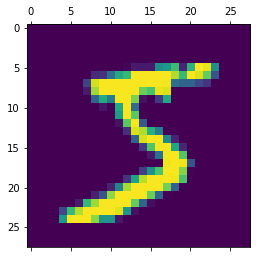

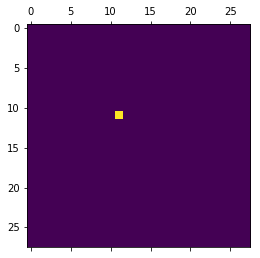

In [32]:
import matplotlib.pyplot as plt
import numpy as np
import scipy

x_example = x_train

plt.matshow(x_example[0, :, :, 0])
plt.show()

pixel_example = np.zeros_like(x_example)
pixel_example[0, 11, 11, 0] = 1.0

plt.matshow(pixel_example[0, :, :, 0])
plt.show()

In [33]:
model.predict(np.expand_dims(pixel_example[0], 0))

array([[0.10327974, 0.10657305, 0.10247784, 0.10637598, 0.09124247,
        0.0966057 , 0.08462051, 0.09882803, 0.10097556, 0.10902113]],
      dtype=float32)

In [0]:
x_rand = np.random.randint(0, 1, (60000, 28, 28, 1))
y_rand = model.predict(x_rand)

x_rand.shape

(60000, 28, 28, 1)

In [0]:
x_rand = np.random.binomial(1, 0.9, (60000, 28, 28, 1))
y_rand = model.predict(x_rand)

x_rand.shape

(60000, 28, 28, 1)

In [0]:
x_rand = np.random.gumbel(size=(60000, 28, 28, 1))
y_rand = model.predict(x_rand)

x_rand.shape

(60000, 28, 28, 1)

In [0]:
x_rand = []
y_rand = []
for p in np.arange(0, 1, 0.1):
  x_rand.append(np.random.binomial(1, p, (6000, 28, 28, 1)))
  y_rand.append(model.predict(x_rand[-1]))

x_rand = np.vstack(x_rand)
y_rand = np.vstack(y_rand)

# Load IsingMNIST

In [0]:
x_train_ising = np.load('train-images-isingmnist.npz')['arr_0']
y_train_ising = np.load('train-labels-isingmnist.npz')['arr_0']
x_test_ising = np.load('t10k-images-isingmnist.npz')['arr_0']
y_test_ising = np.load('t10k-labels-isingmnist.npz')['arr_0']

x_rand = np.vstack([x_train_ising])
x_rand = np.expand_dims(x_rand, axis=-1)
x_rand = (x_rand + 1.0) / 2.0
y_ising = np.concatenate([y_train_ising])
y_rand = model.predict(x_rand)

x_ising = x_rand

In [37]:
x_rand.shape

(60000, 28, 28, 1)

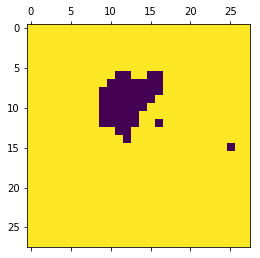

In [38]:
plt.matshow(x_ising[5, :, :, 0])

In [39]:
x_rand.shape

(60000, 28, 28, 1)

In [40]:
y_rand.shape

(60000, 10)

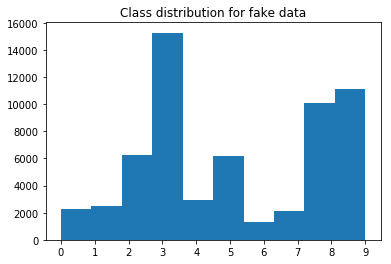

In [41]:
plt.xticks(np.arange(0, 10, step=1))
plt.title('Class distribution for fake data')
plt.hist(np.argmax(y_rand, axis=1))
plt.show()

In [42]:
np.sum(np.argmax(y_rand, axis=1) == 9)

11105

In [43]:
import tensorflow as tf
import datetime, os
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', np.unique(np.argmax(y_rand, axis=1)), np.argmax(y_rand, axis=1), )
class_weights

array([2.65486726, 2.40480962, 0.96076861, 0.39269586, 2.04568701,
       0.97513408, 4.48095594, 2.86123033, 0.59441252, 0.54029716])

In [44]:
'''Trains a simple convnet on the MNIST dataset.

Gets to 99.25% test accuracy after 12 epochs
(there is still a lot of margin for parameter tuning).
16 seconds per epoch on a GRID K520 GPU.
'''

from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 10

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
#(x_train, y_train) = (pixel_batch, pix_softmax_lin)
(x_train, y_train), (x_test, y_test) = mnist.load_data()
#x_train = np.load('notmnist_small_x_train.npz')['arr_0']
#x_test = np.load('notmnist_small_x_val.npz')['arr_0']
#y_train = np.load('notmnist_small_y_train.npz')['arr_0']
#y_test = np.load('notmnist_small_y_val.npz')['arr_0']
(x_train, y_train) = (x_rand, y_rand)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_test /= 255
# convert class vectors to binary class matrices
y_test = keras.utils.to_categorical(y_test, num_classes)
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')







# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)

model_steal = Sequential()
model_steal.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model_steal.add(Conv2D(64, (3, 3), activation='relu'))
model_steal.add(MaxPooling2D(pool_size=(2, 2)))
#model_steal.add(Dropout(0.25))
model_steal.add(Flatten())
model_steal.add(Dense(128, activation='relu'))
#model_steal.add(Dropout(0.5))
model_steal.add(Dense(num_classes, activation='softmax'))


logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir)

model_steal.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model_steal.fit(x_train, y_train,
               batch_size=batch_size,
               epochs=epochs,
               verbose=1,
               validation_data=(x_test, y_test), 
               class_weight=class_weights,
               callbacks=[tensorboard_callback])


score = model_steal.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 95us/step - loss: 1.6506 - acc: 0.5724 - val_loss: 0.4761 - val_acc: 0.8418
Epoch 2/10
60000/60000 [==============================] - 4s 72us/step - loss: 1.4549 - acc: 0.7469 - val_loss: 0.1823 - val_acc: 0.9442
Epoch 3/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.4032 - acc: 0.8144 - val_loss: 0.1090 - val_acc: 0.9706
Epoch 4/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.3801 - acc: 0.8441 - val_loss: 0.0896 - val_acc: 0.9743
Epoch 5/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.3666 - acc: 0.8648 - val_loss: 0.0846 - val_acc: 0.9751
Epoch 6/10
60000/60000 [==============================] - 4s 71us/step - loss: 1.3587 - acc: 0.8810 - val_loss: 0.0711 - val_acc: 0.9792
Epoch 7/10
60000/60000

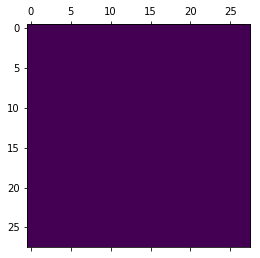

In [45]:
plt.matshow(x_train[-120, :, :, 0])

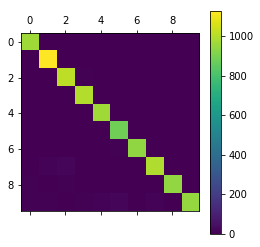

In [46]:
from sklearn.metrics import confusion_matrix

y_pred = model_steal.predict(x_test)

matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
plt.matshow(matrix)
plt.colorbar()
plt.show()

Average precision score, micro-averaged over all classes: 0.18


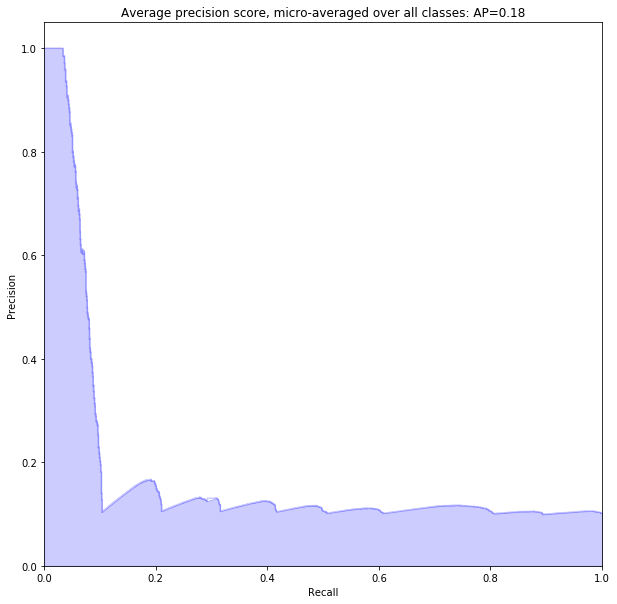

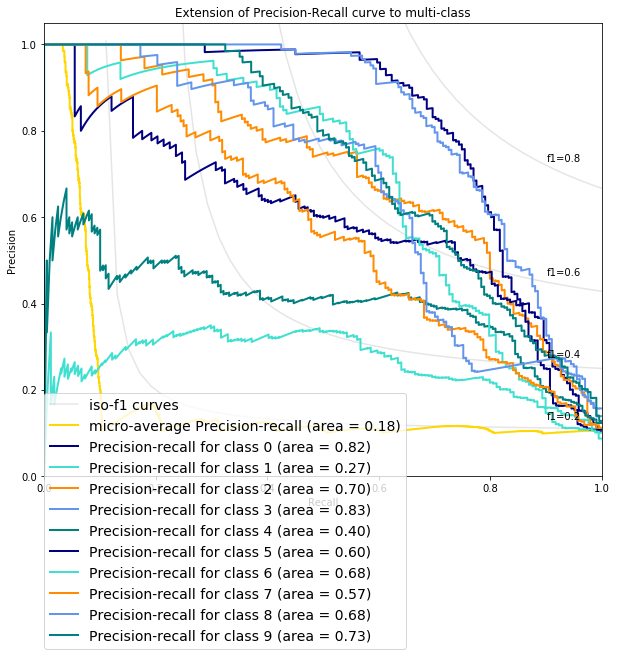

In [0]:
from itertools import cycle
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

n_classes = 10
# For each class
precision = dict()
recall = dict()
average_precision = dict()
for i in range(n_classes):
    precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                        y_pred[:, i])
    average_precision[i] = average_precision_score(y_test[:, i], y_pred[:, i])

# A "micro-average": quantifying score on all classes jointly
precision["micro"], recall["micro"], _ = precision_recall_curve(y_test.ravel(),
    y_pred.ravel())
average_precision["micro"] = average_precision_score(y_test, y_pred,
                                                     average="micro")
print('Average precision score, micro-averaged over all classes: {0:0.2f}'
      .format(average_precision["micro"]))



plt.figure(figsize=(10, 10))
plt.step(recall['micro'], precision['micro'], color='b', alpha=0.2,
         where='post')
plt.fill_between(recall["micro"], precision["micro"], alpha=0.2, color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title(
    'Average precision score, micro-averaged over all classes: AP={0:0.2f}'
    .format(average_precision["micro"]))



# setup plot details
colors = cycle(['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

plt.figure(figsize=(10, 10))
f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

lines.append(l)
labels.append('iso-f1 curves')
l, = plt.plot(recall["micro"], precision["micro"], color='gold', lw=2)
lines.append(l)
labels.append('micro-average Precision-recall (area = {0:0.2f})'
              ''.format(average_precision["micro"]))

for i, color in zip(range(n_classes), colors):
    l, = plt.plot(recall[i], precision[i], color=color, lw=2)
    lines.append(l)
    labels.append('Precision-recall for class {0} (area = {1:0.2f})'
                  ''.format(i, average_precision[i]))

fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Extension of Precision-Recall curve to multi-class')
plt.legend(lines, labels, loc=(0, -.38), prop=dict(size=14))


plt.show()

In [0]:
y_ising_binned = y_ising #// 10

x_sets = []
y_sets = []
 
for i in range(10):
  x_sets.append(x_ising[y_ising_binned == i, :, :, :])
  y_sets.append(y_ising[y_ising_binned == i])

In [0]:
np.stack(y_sets).shape

(10, 7000)

In [0]:
np.stack(x_sets).shape

(10, 7000, 28, 28, 1)

In [0]:
len(x_sets)

10

In [0]:
from __future__ import print_function
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K


n_samples = 1
n_levels = 10
accs = np.zeros([n_samples, n_levels])
losses = np.zeros([n_samples, n_levels])

batch_size = 128
num_classes = 10
epochs = 10








for sample_ind in range(n_samples):
  for temp_level in range(n_levels):
    '''Trains a simple convnet on the MNIST dataset.

    Gets to 99.25% test accuracy after 12 epochs
    (there is still a lot of margin for parameter tuning).
    16 seconds per epoch on a GRID K520 GPU.
    '''

    

    # input image dimensions
    img_rows, img_cols = 28, 28

    # the data, split between train and test sets
    #(x_train, y_train) = (pixel_batch, pix_softmax_lin)
    #(_, _), (x_test, y_test) = fashion_mnist.load_data()
    x_train = np.load('notmnist_small_x_train.npz')['arr_0']
    x_test = np.load('notmnist_small_x_val.npz')['arr_0']
    y_train = np.load('notmnist_small_y_train.npz')['arr_0']
    y_test = np.load('notmnist_small_y_val.npz')['arr_0']

    x_rand = x_sets[temp_level]
    y_rand = model.predict(x_rand)
    (x_train, y_train) = (x_rand, y_rand)

    if K.image_data_format() == 'channels_first':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)

    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_test /= 255
    # convert class vectors to binary class matrices
    y_test = keras.utils.to_categorical(y_test, num_classes)
    print('x_train shape:', x_train.shape)
    print('x_test shape:', x_test.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')




    model_steal = Sequential()
    model_steal.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=input_shape))
    model_steal.add(Conv2D(64, (3, 3), activation='relu'))
    model_steal.add(MaxPooling2D(pool_size=(2, 2)))
    #model_steal.add(Dropout(0.25))
    model_steal.add(Flatten())
    model_steal.add(Dense(128, activation='relu'))
    #model_steal.add(Dropout(0.5))
    model_steal.add(Dense(num_classes, activation='softmax'))

    model_steal.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=keras.optimizers.Adadelta(),
                  metrics=['accuracy'])

    model_steal.fit(x_train, y_train,
                   batch_size=batch_size,
                   epochs=epochs,
                   verbose=1,
                   validation_data=(x_test, y_test), 
                   class_weight=class_weights)


    score = model_steal.evaluate(x_test, y_test, verbose=0)
    print('Sample number:', sample_ind)
    print('Temperature level:', temp_level)
    print('Test loss:', score[0])
    print('Test accuracy:', score[1])

    losses[sample_ind, temp_level] = score[0]
    accs[sample_ind, temp_level] = score[1]


x_train shape: (7000, 28, 28, 1)
x_test shape: (1872, 28, 28, 1)
7000 train samples
1872 test samples
Train on 7000 samples, validate on 1872 samples
Epoch 1/10
7000/7000 [==============================] - 1s 143us/step - loss: 1.1242 - acc: 0.7871 - val_loss: 2.4749 - val_acc: 0.1036
Epoch 2/10
7000/7000 [==============================] - 1s 74us/step - loss: 0.8585 - acc: 0.9157 - val_loss: 2.5105 - val_acc: 0.1036
Epoch 3/10
7000/7000 [==============================] - 1s 73us/step - loss: 0.8176 - acc: 0.9307 - val_loss: 2.4707 - val_acc: 0.1036
Epoch 4/10
7000/7000 [==============================] - 1s 74us/step - loss: 0.7910 - acc: 0.9389 - val_loss: 2.4499 - val_acc: 0.1036
Epoch 5/10
7000/7000 [==============================] - 1s 73us/step - loss: 0.7677 - acc: 0.9480 - val_loss: 2.4492 - val_acc: 0.1036
Epoch 6/10
7000/7000 [==============================] - 1s 73us/step - loss: 0.7527 - acc: 0.9547 - val_loss: 2.4747 - val_acc: 0.1036
Epoch 7/10
7000/7000 [=================

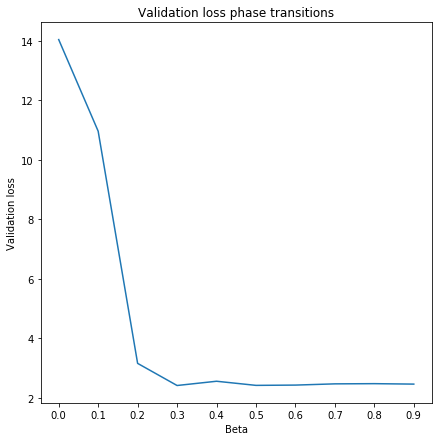

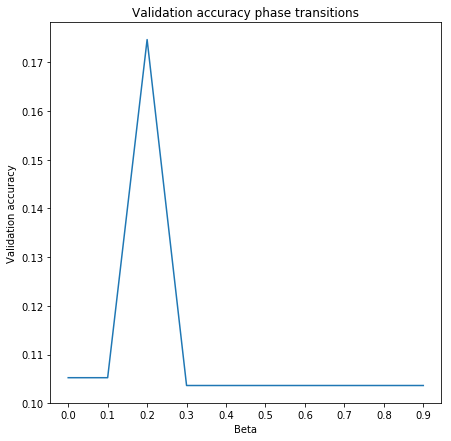

In [0]:
n_steps = 10

l = np.array(losses)
mean_losses = np.mean(l, axis=0)
std_losses = np.std(l, axis=0)

plt.figure(figsize=(7, 7))
plt.title('Validation loss phase transitions')
plt.xlabel('Beta')
plt.ylabel('Validation loss')
x_ticks_labels = ['{:.1f}'.format(i) for i in np.arange(0.0, 1.0, 0.1)]
plt.xticks(np.arange(10), labels=x_ticks_labels)
plt.errorbar(np.arange(n_steps), np.flip(mean_losses), yerr=np.flip(std_losses))
plt.show()


a = np.array(accs)[:, :]
mean_accs = np.mean(a, axis=0)
std_accs = np.std(a, axis=0)

plt.figure(figsize=(7, 7))
plt.title('Validation accuracy phase transitions')
plt.xlabel('Beta')
plt.ylabel('Validation accuracy')
x_ticks_labels = ['{:.1f}'.format(i) for i in np.arange(0.0, 1.0, 0.1)]
plt.xticks(np.arange(10), labels=x_ticks_labels)
plt.errorbar(np.arange(n_steps), np.flip(mean_accs), yerr=np.flip(std_accs))
plt.show()

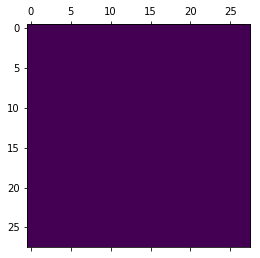

In [0]:
plt.matshow(x_sets[0][-1, :, :, 0])

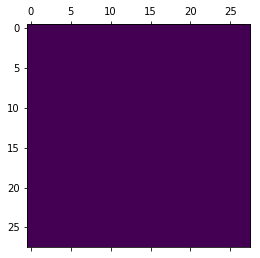

In [152]:
plt.matshow(x_train[-100, :, :, 0])

In [78]:
np.flip(np.arange(0.0, 1.0, 0.1))[-8]

0.7000000000000001